<a href="https://colab.research.google.com/github/dohyeon0608/PerplexityProject/blob/main/yolov8_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLOv8 설치

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 14.3 MB/s eta 0:00:00


필요한 라이브러리 임포트

In [4]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

모델 로드

In [5]:
model = YOLO('yolov8n.pt')  # 'n'은 가장 작은 모델, 더 큰 모델을 원하면 's', 'm', 'l', 'x' 중 선택


100%|██████████| 6.25M/6.25M [00:00<00:00, 18.0MB/s]


도로 이미지 다운로드

In [6]:
# skip

--2024-12-14 01:44:24--  https://example.com/road_image.jpg
Resolving example.com (example.com)... 93.184.215.14, 2606:2800:21f:cb07:6820:80da:af6b:8b2c
Connecting to example.com (example.com)|93.184.215.14|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-12-14 01:44:25 ERROR 404: Not Found.



In [7]:
results = model('0000721.jpg')


image 1/1 /content/0000721.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 368.1ms
Speed: 15.9ms preprocess, 368.1ms inference, 38.9ms postprocess per image at shape (1, 3, 384, 640)


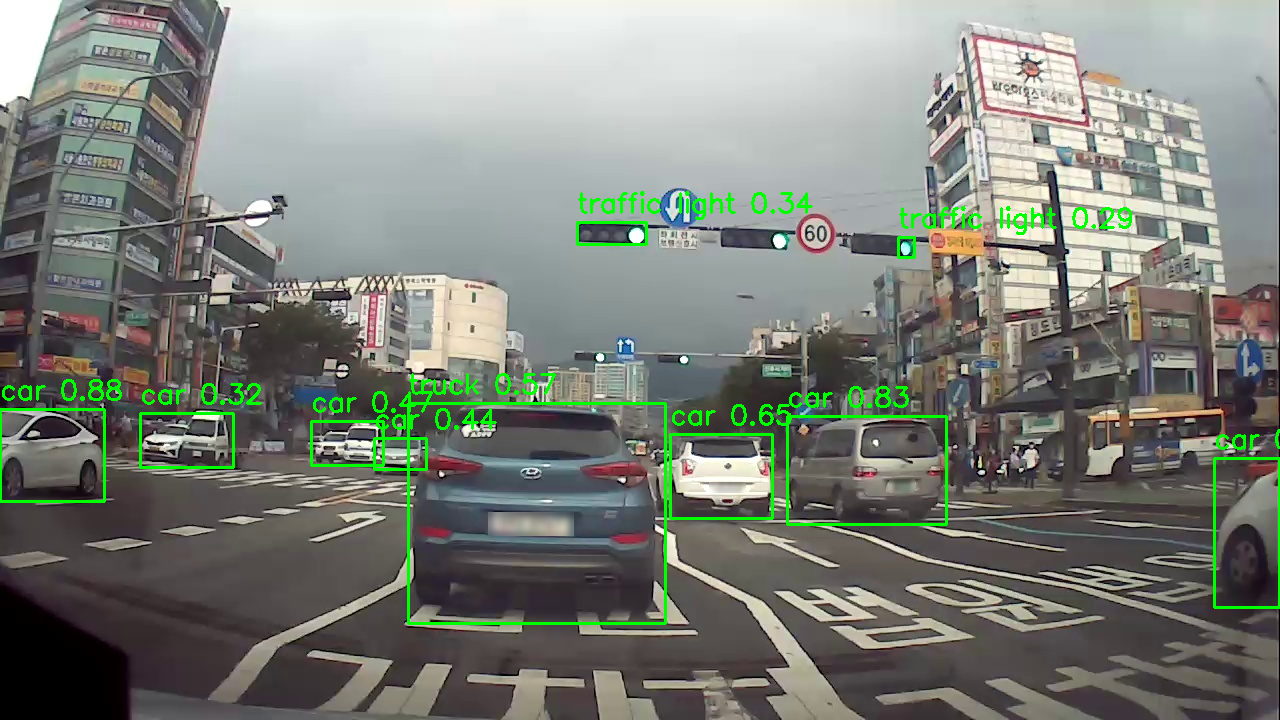

In [9]:
img = cv2.imread('0000721.jpg')
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f'{model.names[int(box.cls[0])]} {box.conf[0].item():.2f}',
                    (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2_imshow(img)

In [10]:
for r in results:
    print(r.boxes)  # 바운딩 박스 정보
    print(r.boxes.cls)  # 클래스 ID
    print(r.boxes.conf)  # 신뢰도 점수

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 7., 2., 2., 9., 2., 9.])
conf: tensor([0.8752, 0.8261, 0.6529, 0.5798, 0.5701, 0.4737, 0.4432, 0.3422, 0.3249, 0.2925])
data: tensor([[5.2924e-01, 4.0994e+02, 1.0467e+02, 5.0131e+02, 8.7523e-01, 2.0000e+00],
        [7.8715e+02, 4.1657e+02, 9.4689e+02, 5.2451e+02, 8.2613e-01, 2.0000e+00],
        [6.7087e+02, 4.3483e+02, 7.7254e+02, 5.1853e+02, 6.5288e-01, 2.0000e+00],
        [1.2146e+03, 4.5878e+02, 1.2794e+03, 6.0798e+02, 5.7978e-01, 2.0000e+00],
        [4.0858e+02, 4.0349e+02, 6.6537e+02, 6.2309e+02, 5.7008e-01, 7.0000e+00],
        [3.1166e+02, 4.2139e+02, 3.8396e+02, 4.6516e+02, 4.7372e-01, 2.0000e+00],
        [3.7443e+02, 4.3879e+02, 4.2683e+02, 4.6931e+02, 4.4322e-01, 2.0000e+00],
        [5.7717e+02, 2.2257e+02, 6.4667e+02, 2.4439e+02, 3.4217e-01, 9.0000e+00],
        [1.4065e+02, 4.1335e+02, 2.3388e+02, 4.6767e+02, 3.2487e-01, 2.0000e+00],
        [8.9886e+02, 2.3770e+02, 9.1450e+02, 2.57

In [11]:
from collections import Counter

# 결과에서 클래스 ID 추출
class_ids = [int(box.cls[0]) for r in results for box in r.boxes]

# 클래스 ID 개수 세기
class_counts = Counter(class_ids)

# 클래스 이름과 개수 출력
for class_id, count in class_counts.items():
    class_name = model.names[class_id]
    print(f"{class_name}: {count}")


car: 7
truck: 1
traffic light: 2


In [13]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from collections import Counter
import time

# 두 모델 로드
model_n = YOLO('yolov8n.pt')
model_m = YOLO('yolov8l.pt')

# 이미지 로드
img_path = '0000721.jpg'
img = cv2.imread(img_path)

# 함수 정의: 객체 감지 및 결과 시각화
def detect_and_visualize(model, img, color):
    start_time = time.time()
    results = model(img)
    end_time = time.time()

    detection_time = end_time - start_time

    # 결과 시각화
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, f'{model.names[int(box.cls[0])]} {box.conf[0].item():.2f}',
                        (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # 클래스 개수 세기
    class_ids = [int(box.cls[0]) for r in results for box in r.boxes]
    class_counts = Counter(class_ids)

    return img, class_counts, detection_time

# YOLOv8n 모델로 감지
img_n, counts_n, time_n = detect_and_visualize(model_n, img.copy(), (0, 255, 0))  # 녹색

# YOLOv8m 모델로 감지
img_m, counts_m, time_m = detect_and_visualize(model_m, img.copy(), (0, 0, 255))  # 빨간색

# 결과 출력
print("YOLOv8n 결과:")
for class_id, count in counts_n.items():
    print(f"{model_n.names[class_id]}: {count}")
print(f"감지 시간: {time_n:.4f} 초")

print("\nYOLOv8m 결과:")
for class_id, count in counts_m.items():
    print(f"{model_m.names[class_id]}: {count}")
print(f"감지 시간: {time_m:.4f} 초")

# 결과 이미지 표시
cv2_imshow(img_n)
cv2_imshow(img_m)



0: 384x640 7 cars, 1 truck, 2 traffic lights, 167.9ms
Speed: 13.1ms preprocess, 167.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 10 cars, 1 bus, 1 truck, 4 traffic lights, 1714.5ms
Speed: 3.4ms preprocess, 1714.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
YOLOv8n 결과:
car: 7
truck: 1
traffic light: 2
감지 시간: 0.2895 초

YOLOv8m 결과:
car: 10
bus: 1
person: 3
traffic light: 4
truck: 1
감지 시간: 2.5873 초
